In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df_ = pd.read_csv(r"D:\Nikunj\Projects\New folder\sentiment\tinder_google_play_reviews.csv")

In [4]:
df_.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,38335c6a-c4f5-458e-be0f-7857c7f9aab2,Mi55ed_m3,https://play-lh.googleusercontent.com/a-/ALV-U...,Why do I have to pay to see who likes me and m...,1,0,15.0.0,2024-02-02 00:25:11,Thanks for sharing this. We’re sorry to hear a...,2024-02-02 01:10:09,15.0.0
1,f8d06b30-581c-4a40-9f51-c08f0696b534,John Cusimano,https://play-lh.googleusercontent.com/a-/ALV-U...,"(I didn't talk negative about tinder, I actual...",5,0,15.0.0,2024-02-02 00:16:12,Thank you for your comment. We're sorry you di...,2024-02-03 00:12:34,15.0.0
2,e59611ec-fd96-4779-949b-0e774b68ff52,Wisdom Afoolweakness,https://play-lh.googleusercontent.com/a-/ALV-U...,To many micro transactions looks like this app...,1,0,15.0.0,2024-02-02 00:07:47,NaN,NaN,15.0.0
3,e3501caf-6f2e-4df9-a523-83199d31b810,Luke Taylor,https://play-lh.googleusercontent.com/a-/ALV-U...,Got a lot of matches in the first hour then no...,2,0,NaN,2024-02-02 00:06:53,NaN,NaN,NaN
4,57a3a20c-b5e8-4961-bbaa-2f5074752689,Hanna Maes,https://play-lh.googleusercontent.com/a-/ALV-U...,tinder gives you the chance to kick the bad on...,5,0,15.0.0,2024-02-01 23:40:19,Sorry to hear you’re having a negative experie...,2024-02-01 23:50:28,15.0.0


In [5]:
df =df_[['score', 'content']].copy()

df.head()

,score,content
0,1,Why do I have to pay to see who likes me and m...
1,5,"(I didn't talk negative about tinder, I actual..."
2,1,To many micro transactions looks like this app...
3,2,Got a lot of matches in the first hour then no...
4,5,tinder gives you the chance to kick the bad on...


<Axes: >

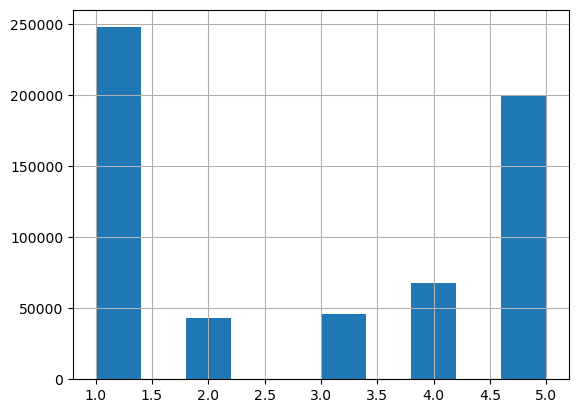

In [6]:
df['score'].hist()

In [7]:
def map_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['score'].apply(map_sentiment)

# Drop the original 'score' column if needed
df.drop('score', axis=1, inplace=True)

# Display the DataFrame
print(df)

                                                  content sentiment
0       Why do I have to pay to see who likes me and m...  Negative
1       (I didn't talk negative about tinder, I actual...  Positive
2       To many micro transactions looks like this app...  Negative
3       Got a lot of matches in the first hour then no...  Negative
4       tinder gives you the chance to kick the bad on...  Positive
...                                                   ...       ...
604358                                          Well done  Positive
604359                       Met some cool girls on here.  Positive
604360  Good idea but it fails when trying to upload n...   Neutral
604361                     Fun but the chat is super slow  Positive
604362                            Great fun addictive app  Positive

[604363 rows x 2 columns]


<Axes: >

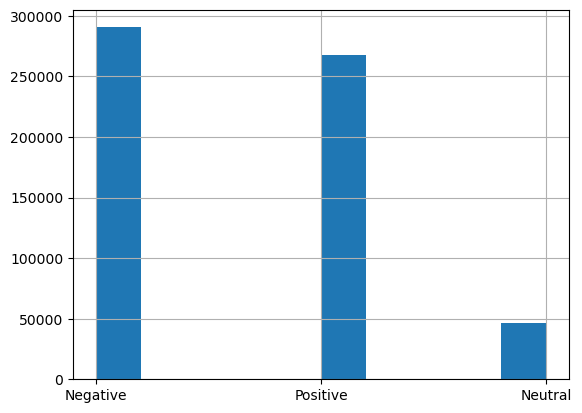

In [8]:
df['sentiment'].hist()

In [9]:
target_map = {'Positive' : 1, 'Negative':0, 'Neutral':2}
df['target'] = df['sentiment'].map(target_map)

In [10]:
df.head()

,content,sentiment,target
0,Why do I have to pay to see who likes me and m...,Negative,0
1,"(I didn't talk negative about tinder, I actual...",Positive,1
2,To many micro transactions looks like this app...,Negative,0
3,Got a lot of matches in the first hour then no...,Negative,0
4,tinder gives you the chance to kick the bad on...,Positive,1


In [11]:
df_train, df_test= train_test_split(df)

In [12]:
df_train.head()

,content,sentiment,target
294695,"Loving the app, connectd you to a category of ...",Neutral,2
174055,"Fake, very poor app, after making payment ever...",Negative,0
124513,Extreme,Positive,1
293399,Alright I Guess Notifications on an Oppo devic...,Neutral,2
417575,Cant log in to facebook..... I triedit many times,Negative,0


In [13]:
vectorizer = TfidfVectorizer(max_features=2000)

In [16]:
X_train = vectorizer.fit_transform(df_train['content'].values.astype('U'))

In [17]:
X_train

<453272x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 5330614 stored elements in Compressed Sparse Row format>

In [19]:
X_test= vectorizer.transform(df_test['content'].values.astype('U'))

In [22]:
Y_train = df_train['target']
Y_test = df_test['target']

In [23]:
model = LogisticRegression(max_iter = 500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8400342399265783
Test acc: 0.8359002190732737


In [24]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [25]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.9105253 , 0.08600512, 0.00346958],
       [0.09478058, 0.90043288, 0.00478655],
       [0.54357812, 0.41580906, 0.04061283]])

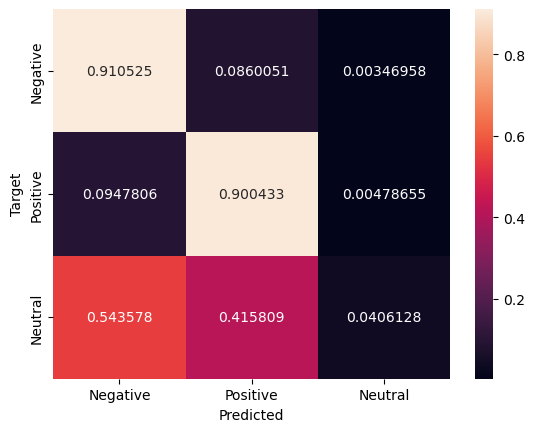

In [26]:
def plot_cm(cm):
    classes = ['Negative', 'Positive', 'Neutral']
    df_cm = pd.DataFrame(cm, index=classes, columns= classes)
    ax = sn.heatmap(df_cm, annot =True, fmt ='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
plot_cm(cm)

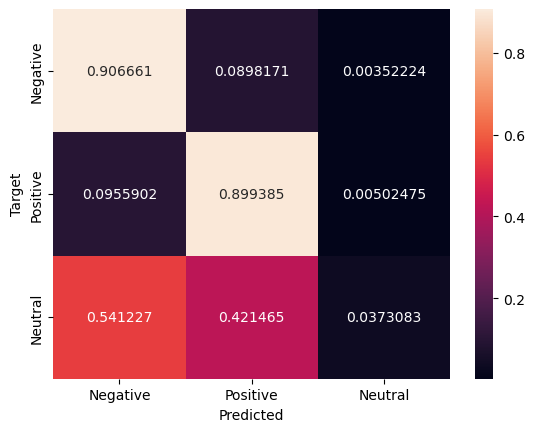

In [28]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)